In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
# Which parts of the year are investments/acquisitions more active? 
# Is there a part of the year where the overall number of investments are larger?



In [5]:
investments = pd.read_csv('investments.csv')

In [6]:
investments.dtypes

company_permalink           object
company_name                object
company_category_list       object
company_country_code        object
company_state_code          object
company_region              object
company_city                object
investor_permalink          object
investor_name               object
investor_country_code       object
investor_state_code         object
investor_region             object
investor_city               object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [7]:
# Convert the funded_at column into a DateTime type for easier analysis
# Refer to the pandas TimeSeries and .dt properties on the pandas API Reference
investments['funded_at'] = pd.to_datetime(investments.funded_at)

In [8]:
investments.dtypes

company_permalink                  object
company_name                       object
company_category_list              object
company_country_code               object
company_state_code                 object
company_region                     object
company_city                       object
investor_permalink                 object
investor_name                      object
investor_country_code              object
investor_state_code                object
investor_region                    object
investor_city                      object
funding_round_permalink            object
funding_round_type                 object
funding_round_code                 object
funded_at                  datetime64[ns]
raised_amount_usd                 float64
dtype: object

In [9]:
# Add a new column that specifies which quarter of the year the investment
# was made in. Could be useful for plotting?
investments['quarter'] = investments.funded_at.dt.quarter

In [10]:
# Add a new column that specifies the name of the month that the investment was made
investments['month'] = investments.funded_at.dt.month_name()

In [11]:
investments.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,quarter,month
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,1,March
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN,3,July
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0,3,July
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0,4,November
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0,2,May


In [12]:
# how many investments occur per quarter? 
quarterly_investments = investments.groupby('quarter')['company_permalink'].count()

In [13]:
quarterly_investments
# Seems to not be that interesting

quarter
1    43879
2    42222
3    42610
4    39936
Name: company_permalink, dtype: int64

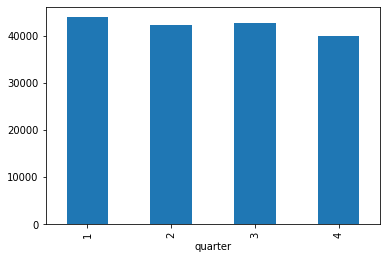

In [14]:
# not really interesting
quarterly_investments.plot.bar()

In [15]:
# Now doing the same for monthly investments

In [16]:
monthly_investments = investments.groupby('month')['company_name'].count()

In [17]:
monthly_investments

month
April        13524
August       13422
December     11813
February     11922
January      18127
July         14243
June         15286
March        13829
May          13412
November     13490
October      14633
September    14945
Name: company_name, dtype: int64

In [18]:
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [19]:
monthly_investments.reindex(index=months_in_order)

month
January      18127
February     11922
March        13829
April        13524
May          13412
June         15286
July         14243
August       13422
September    14945
October      14633
November     13490
December     11813
Name: company_name, dtype: int64

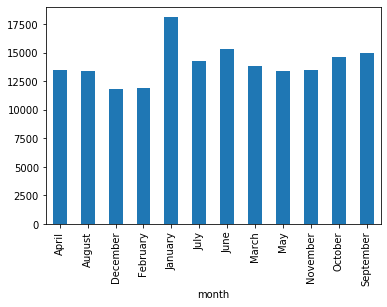

In [20]:
fig = plt.figure()
monthly_investments.plot(kind='bar')

In [ ]:
# January sees the most activity

In [21]:
# now do similar stuff for the aacquisitions.csv file...